*Copyright 2024 Jaeyoung Chun*

You may not make copies of this and use or distribute it for any purpose.

# Heat Map

In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [2]:
df = pd.read_csv("./data/events_pass_simple.csv")

In [3]:
df

,period,team,type,x_start,y_start,x_end,y_end
0,1,South Korea,Pass,60.0,40.0,39.9,29.0
1,1,South Korea,Pass,39.7,30.0,31.9,16.7
2,1,South Korea,Pass,37.4,8.9,49.8,3.6
3,1,South Korea,Pass,42.1,3.4,31.5,3.6
4,1,South Korea,Pass,30.6,4.1,57.7,11.7
...,...,...,...,...,...,...,...
1002,2,South Korea,Pass,94.3,76.4,89.5,78.9
1003,2,South Korea,Pass,88.1,78.2,79.6,76.2
1004,2,South Korea,Pass,79.3,75.4,81.9,72.3
1005,2,Portugal,Pass,38.2,7.8,68.1,12.9


## Filter

### South Korea Only

In [4]:
df.team.unique()

array(['South Korea', 'Portugal'], dtype=object)

In [5]:
df = df[ df.team == "South Korea" ]

In [6]:
len(df)

388

### Second Half Only

In [7]:
df.period.unique()

array([1, 2])

In [8]:
df = df[ df.period == 2 ]

In [9]:
len(df)

156

## Pass Map

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from mplsoccer import Pitch, VerticalPitch

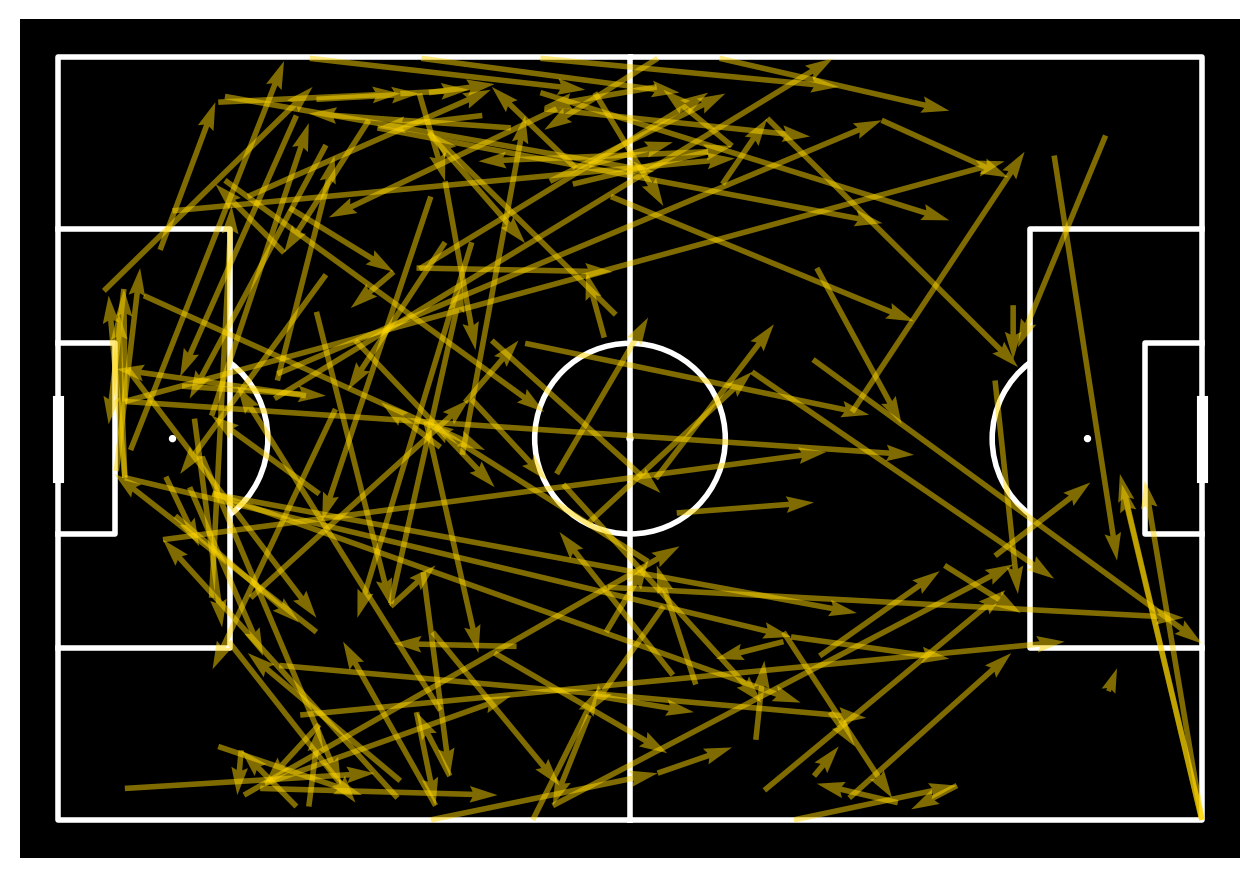

In [11]:
pitch = Pitch(
    pitch_type="statsbomb",
    pitch_color="black",
    line_color="white"
)

fig, ax = pitch.draw()

for row in df.itertuples():
    pitch.arrows(
        row.x_start, row.y_start, row.x_end, row.y_end,
        ax=ax, color="gold", alpha=0.5, width=2
    )
    # pitch.scatter(row.x_start, row.y_start, ax=ax, color="gold")

plt.show()

## Heat Map

`kdeplot`: Kernel Density Estimate (KDE) plot

### First Attempt

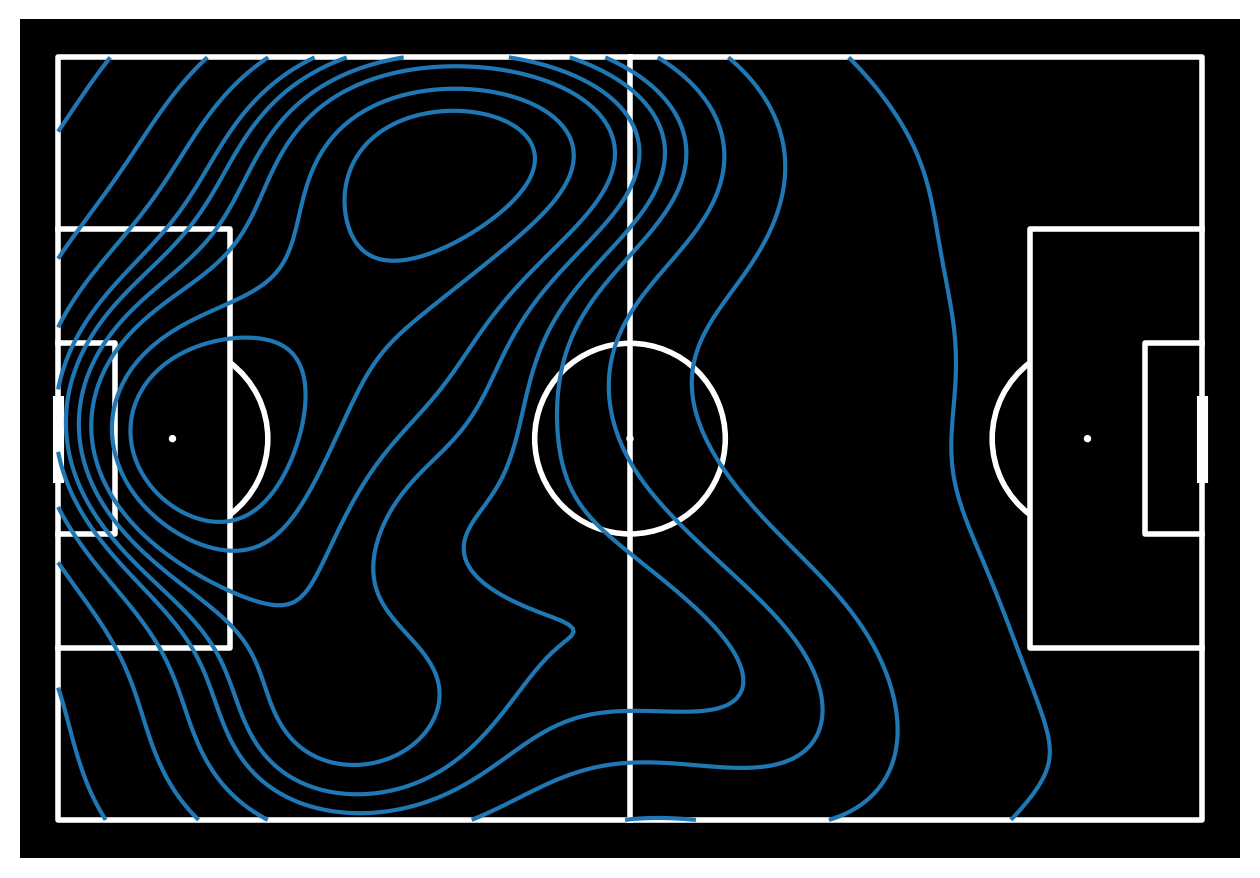

In [12]:
pitch = Pitch(
    pitch_type="statsbomb",
    pitch_color="black",
    line_color="white"
)

fig, ax = pitch.draw()

pitch.kdeplot(x=df.x_start, y=df.y_start, ax=ax)

plt.show()

### Fill

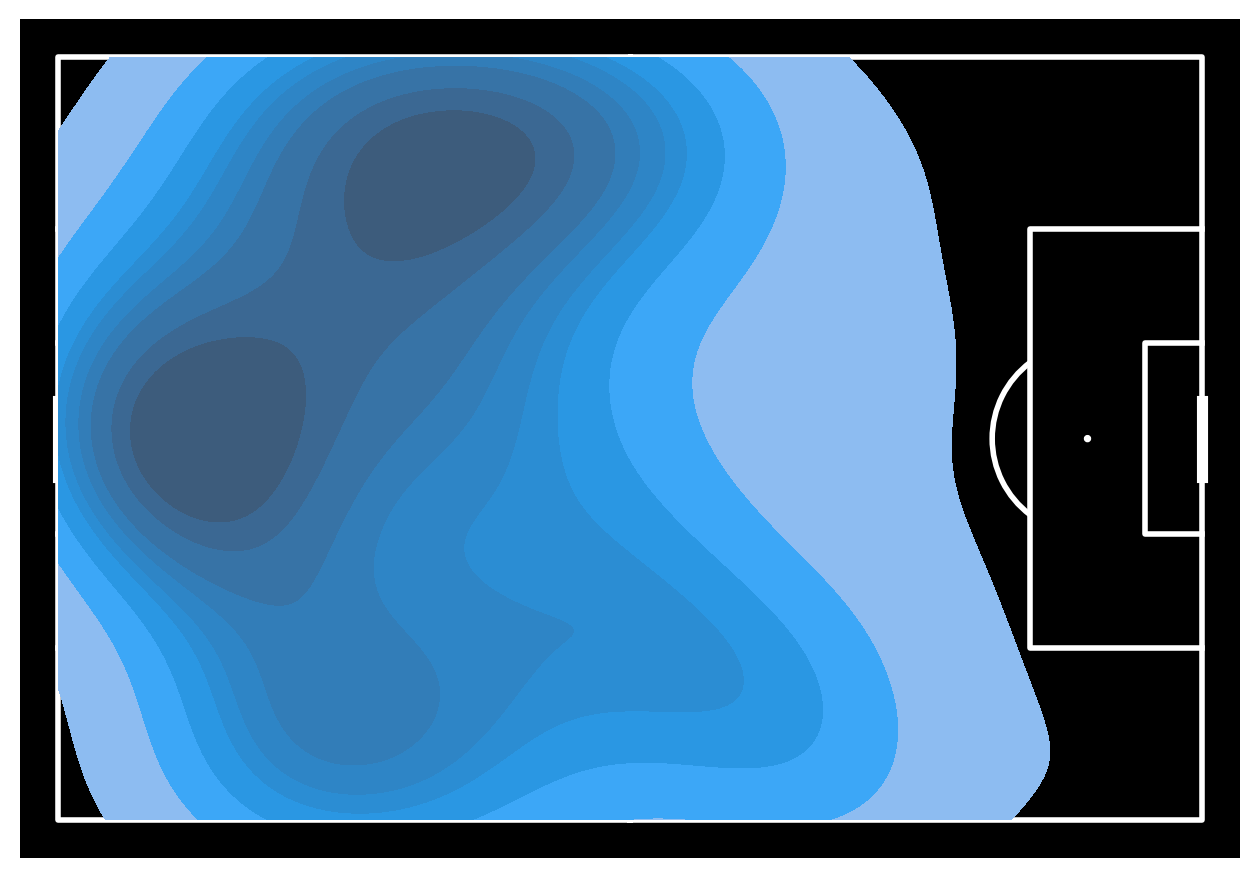

In [13]:
pitch = Pitch(
    pitch_type="statsbomb",
    pitch_color="black",
    line_color="white"
)

fig, ax = pitch.draw()

pitch.kdeplot(x=df.x_start, y=df.y_start, ax=ax, fill=True)

plt.show()

### Color

In [14]:
import matplotlib

In [15]:
custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom_cmap", ["red", "black"])

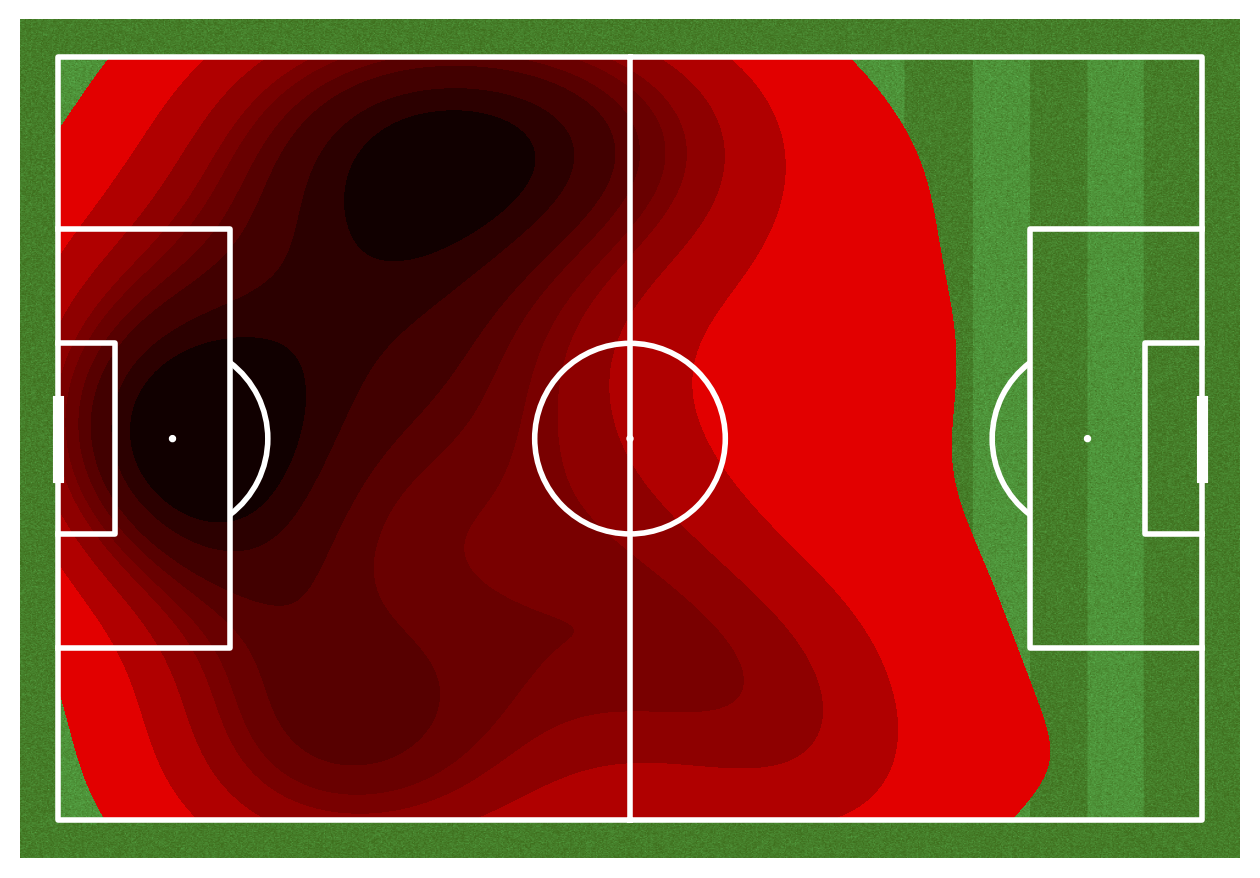

In [16]:
pitch = Pitch(
    pitch_type="statsbomb",
    line_zorder=100,
    pitch_color="grass", stripe=True,
    line_color="white"
)

fig, ax = pitch.draw()

pitch.kdeplot(
    x=df.x_start, y=df.y_start, ax=ax,
    fill=True,
    cmap=custom_cmap
)

plt.show()

### Pass Start and End

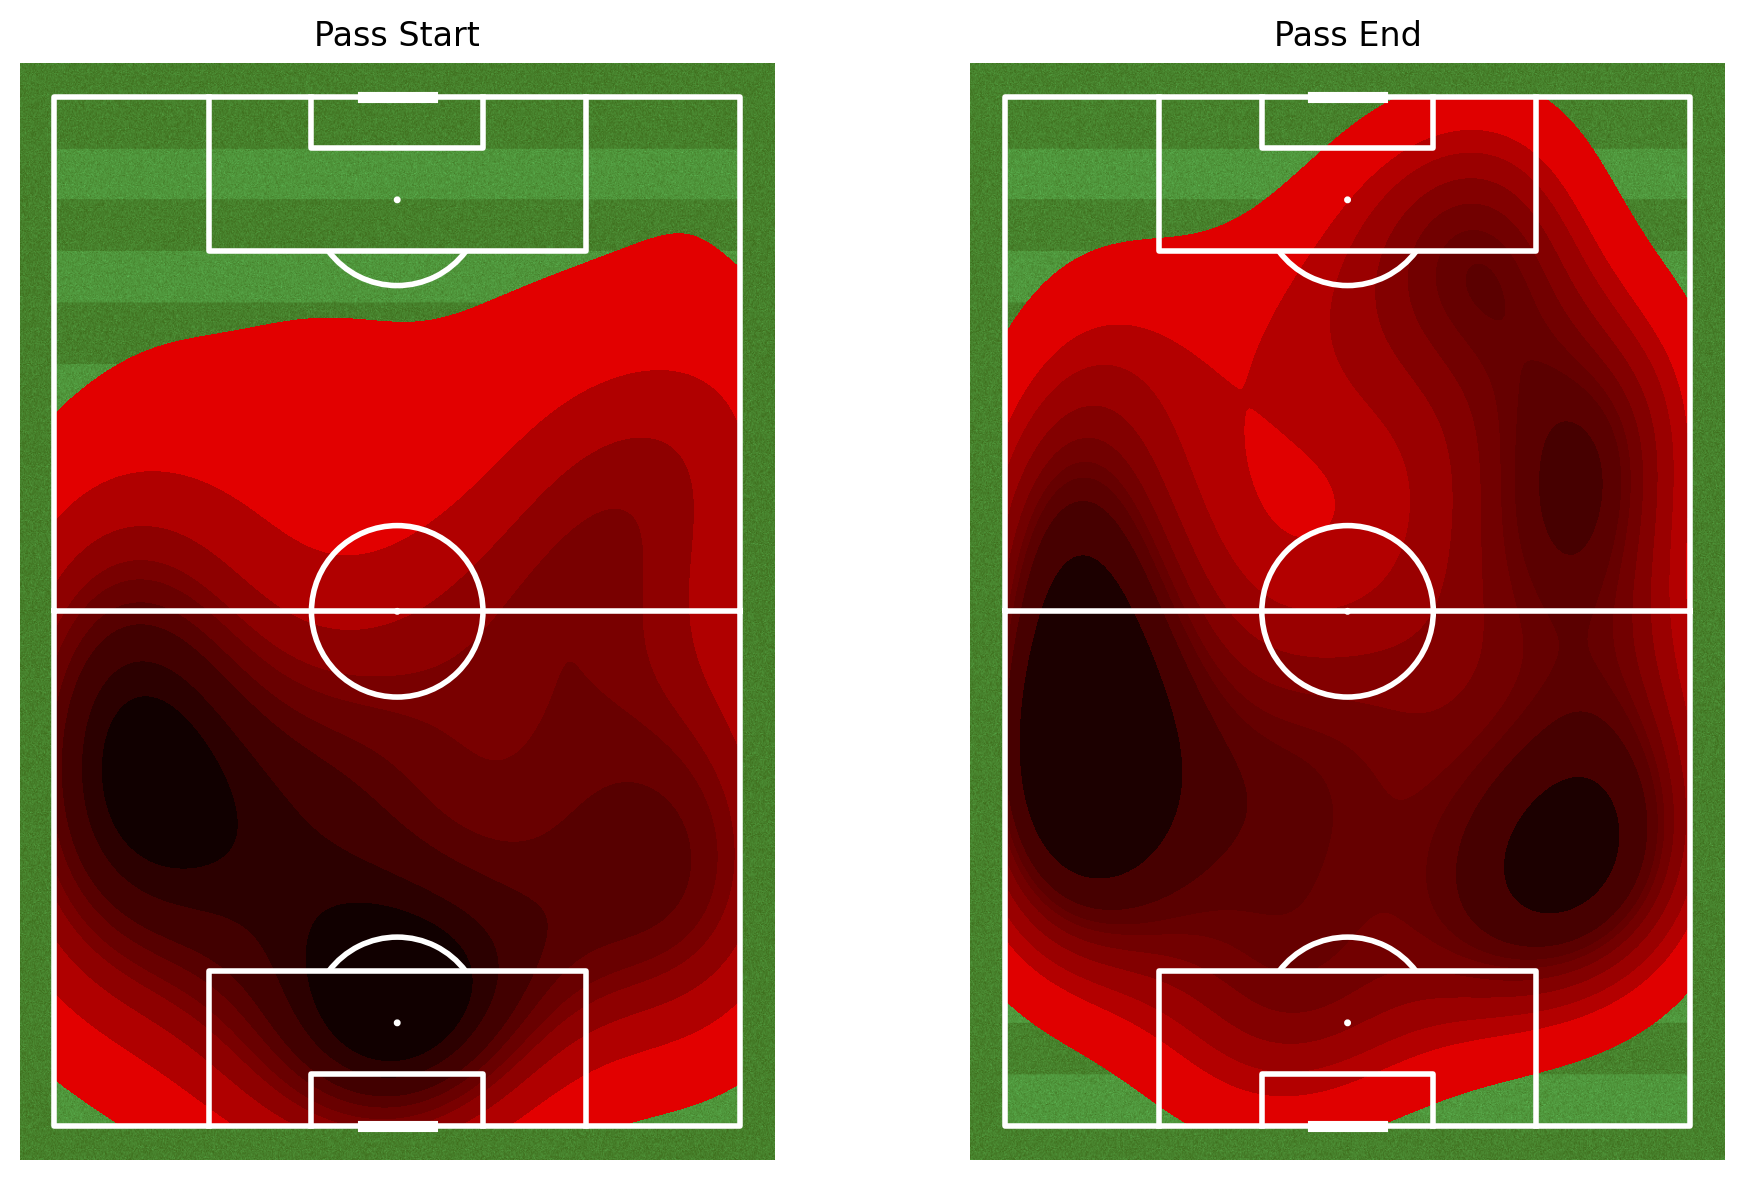

In [17]:
pitch = VerticalPitch(
    pitch_type="statsbomb",
    line_zorder=100,
    pitch_color="grass", stripe=True,
    line_color="white"
)

fig, ax = pitch.draw(nrows=1, ncols=2, figsize=(10, 6))

pitch.kdeplot(
    x=df.x_start, y=df.y_start, ax=ax[0],
    fill=True,
    cmap=custom_cmap
)

pitch.kdeplot(
    x=df.x_end, y=df.y_end, ax=ax[1],
    fill=True,
    cmap=custom_cmap
)

ax[0].set_title("Pass Start")
ax[1].set_title("Pass End")

plt.show()